The cells below include functions for running the various models mentioned in our paper on a test dataset. Some pretrained models are included for convenience. Also, the default value for the test dataset is a run on the australia track. To switch to a dataset collected on the bahrain track, change the "australia" in "test_datasets/australia" to "bahrain".

PILOTNET:

9995it [00:17, 555.70it/s, cum_loss=0.11]  


RMS Error:  0.33092516042115766


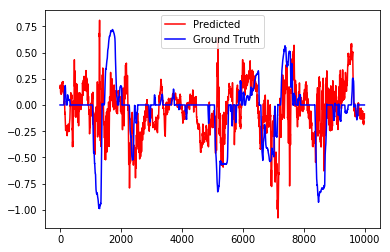

In [11]:
import cv2
import glob
import numpy as np
import nn_models
import data_loading.image_loading as il
import nn_models.Models as models
import data_loading.data_loaders as loaders
import numpy.random
import torch, random
import torch.nn as nn 
import torch.optim as optim
from tqdm import tqdm as tqdm
import pickle
from datetime import datetime
import os
import string
import argparse
from random import randint
from datetime import datetime
import imutils.annotation_utils
from data_loading.image_loading import load_image
import torchvision.transforms as transforms
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
def main(annfile = 'test_datasets/australia/linear.csv', model_file_ = 'test_models/train_f1_australia/pilotnet/_epoch100.model'):
    
    plot=True
    gpu=0
    
    
    
    annotation_dir, annotation_file = os.path.split(annfile)
    model_dir, model_file = os.path.split(model_file_)
    leaf_model_dir = os.path.basename(model_dir)
    config_path = os.path.join(model_dir,'config.pkl')
    config_file = open(config_path,'rb')
    config = pickle.load(config_file)

    model_prefix = leaf_model_dir + model_file.split(".")[0]
   # return

    use_float32 = bool(config['use_float32'])
    label_scale = float(config['label_scale'])
    size = (66,200)
    prefix, _ = annotation_file.split(".")
    prefix = prefix + config['file_prefix']
    dataset_type = config['dataset_type']
    input_channels = 3
    output_dimension = 1
    valset = loaders.F1ImageDataset(annfile, size)
    #optical_flow = bool(config.get('optical_flow',''))
    network = models.PilotNet()
    state_dict = torch.load(model_file_)
    network.load_state_dict(state_dict)
 #   network.projector_input = torch.load(  open(os.path.join(model_dir,"projector_input.pt"), 'r+b') ).cuda(gpu)
    #network.init_hidden = torch.load(  open(os.path.join(model_dir,"init_hidden.pt"), 'r+b') ).cuda(gpu)
  #  network.init_cell = torch.load(  open(os.path.join(model_dir,"init_cell.pt"), 'r+b') ).cuda(gpu)
    network = network.float()

    if(gpu>=0):
        network = network.cuda(gpu)
    
    annotation_prefix = annotation_file.split(".")[0]
    image_pickle = os.path.join(valset.root_folder,prefix + valset.image_pickle_postfix)
    labels_pickle = os.path.join(valset.root_folder,prefix + valset.label_pickle_postfix)
    if(os.path.isfile(image_pickle) and os.path.isfile(labels_pickle)):
        valset.loadPickles()
    else:  
        valset.loadFiles()
        valset.writePickles()

    predictions=[]
    ground_truths=[]
    losses=[]
    criterion = nn.MSELoss()
    cum_loss = 0.0
    num_samples = 0
    if(gpu>=0):
        criterion = criterion.cuda(gpu)
    network.eval()
    batch_size = 1
    loader = torch.utils.data.DataLoader(valset, batch_size = batch_size, shuffle = False, num_workers = 0)
    
    t = tqdm(enumerate(loader))
    for (i, (inputs, labels)) in t:
        labels = labels[:,0:output_dimension]
      #  print(inputs.shape)
       # print(labels.shape)
        if gpu>=0:
            inputs = inputs.cuda(gpu)
            labels = labels.cuda(gpu)
        # Forward pass:
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        prediction = ((outputs.cpu())).item()
        ground_truth = ((labels.cpu())).item()

        predictions.append(prediction)
        ground_truths.append(ground_truth)
        # logging information
        loss_ = loss.item()
        cum_loss += loss_
        num_samples += batch_size
        t.set_postfix(cum_loss = cum_loss/num_samples)
 

    predictions_array = np.array(predictions)
    ground_truths_array = np.array(ground_truths)
    output_file_prefix = "pilotnet_prediction_" + os.path.basename(annotation_dir) + model_prefix
    log_name = output_file_prefix + ".txt"
    # imdir = "admiralnet_prediction_images_" + model_prefix
    #if(os.path.exists(imdir)==False):
    #    os.mkdir(imdir)
    log_output_path = log_name
    log = list(zip(ground_truths_array,predictions_array))
    with open(log_output_path, "w") as myfile:
        for x in log:
            log_item = [x[0],x[1]]
            myfile.write("{0},{1}\n".format(log_item[0],log_item[1]))
            
    diffs = np.square(np.subtract(predictions_array,ground_truths_array))

    rms = np.sqrt(np.mean(np.array(diffs)))
    rms_scikit = sqrt(mean_squared_error(predictions_array, ground_truths_array))
    print("RMS Error: ", rms)

    if plot:
        fig = plt.figure()
        ax = plt.subplot(111)
        t = np.linspace(0,len(predictions_array)-1,len(predictions_array))
        ax.plot(t,predictions_array,'r',label='Predicted')
        ax.plot(t,ground_truths_array,'b',label='Ground Truth')
        ax.legend()
        plt.savefig(output_file_prefix + ".jpeg")
       # plt.show()
main()


In [13]:
CNN-LSTM:

SyntaxError: invalid syntax (<ipython-input-13-ca836af6574f>, line 1)

11985it [00:32, 363.18it/s, cum_loss=0.0221]


RMS Error:  0.14858507755489636


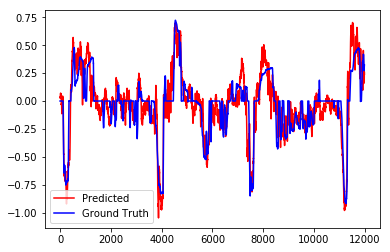

In [4]:
import cv2
import glob
import numpy as np
import nn_models
import data_loading.image_loading as il
import nn_models.Models as models
import data_loading.data_loaders as loaders
import numpy.random
import torch, random
import torch.nn as nn 
import torch.optim as optim
from tqdm import tqdm as tqdm
import pickle
from datetime import datetime
import os
import string
import argparse
from random import randint
from datetime import datetime
import imutils.annotation_utils
from data_loading.image_loading import load_image
import torchvision.transforms as transforms
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def main():
    gpu = 0
    plot = True
    annfile = 'test_datasets/australia/linear.csv'
    annotation_dir, annotation_file = os.path.split(annfile)
    model_file_ = 'test_models/train_f1_australia/cnnlstm/_epoch100.model' 
    
    
    model_dir, model_file = os.path.split(model_file_)
    leaf_model_dir = os.path.basename(model_dir)
    config_path = os.path.join(model_dir,'config.pkl')
    config_file = open(config_path,'rb')
    config = pickle.load(config_file)
   

    model_prefix = leaf_model_dir + model_file.split(".")[0]
   # return

    use_float32 = bool(config['use_float32'])
    label_scale = float(config['label_scale'])
    size = (66,200)
    prefix, _ = annotation_file.split(".")
    prefix = prefix + config['file_prefix']
    context_length = int(config['context_length'])
    sequence_length = int(config['sequence_length'])
    hidden_dim = int(config['hidden_dimension'])
    dataset_type = config['dataset_type']
    output_dimension = 1
    if dataset_type=='optical_flow':
        input_channels=2
        valset = loaders.F1OpticalFlowDataset(annfile, size, context_length = context_length, sequence_length = sequence_length)
    elif dataset_type=='raw_images':
        input_channels=1
        valset = loaders.F1ImageSequenceDataset(annfile, size, context_length = context_length, sequence_length = sequence_length)
    elif dataset_type=='combined':
        input_channels=3
        valset = loaders.F1CombinedDataset(annfile, size, context_length = context_length, sequence_length = sequence_length)
    #optical_flow = bool(config.get('optical_flow',''))
    rnn_cell_type='lstm'
    network = models.CNNLSTM(input_channels= input_channels, gpu = gpu, cell=rnn_cell_type, context_length = context_length, sequence_length=sequence_length, hidden_dim = hidden_dim)
    state_dict = torch.load(model_file_)
    network.load_state_dict(state_dict)
    network.projector_input = torch.load(  open(os.path.join(model_dir,"projector_input.pt"), 'r+b') ).cuda(gpu)
    #network.init_hidden = torch.load(  open(os.path.join(model_dir,"init_hidden.pt"), 'r+b') ).cuda(gpu)
  #  network.init_cell = torch.load(  open(os.path.join(model_dir,"init_cell.pt"), 'r+b') ).cuda(gpu)
    network = network.float()

    if(gpu>=0):
        network = network.cuda(gpu)
    
    annotation_prefix = annotation_file.split(".")[0]
    image_pickle = os.path.join(valset.root_folder,prefix + valset.image_pickle_postfix)
    labels_pickle = os.path.join(valset.root_folder,prefix + valset.label_pickle_postfix)
    if(os.path.isfile(image_pickle) and os.path.isfile(labels_pickle)):
        valset.loadPickles()
    else:  
        valset.loadFiles()
        valset.writePickles()

    predictions=[]
    ground_truths=[]
    losses=[]
    criterion = nn.MSELoss()
    cum_loss = 0.0
    num_samples = 0
    if(gpu>=0):
        criterion = criterion.cuda(gpu)
    network.eval()
    batch_size = 1
    loader = torch.utils.data.DataLoader(valset, batch_size = batch_size, shuffle = False, num_workers = 0)
    
    t = tqdm(enumerate(loader))
    for (i, (inputs, labels)) in t:
        labels = labels[:,:,0:output_dimension]
        if gpu>=0:
            inputs = inputs.cuda(gpu)
            labels = labels.cuda(gpu)
        # Forward pass:
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        prediction = ((outputs.cpu())[0][0][0]).item()
        ground_truth = ((labels.cpu())[0][0][0]).item()

        predictions.append(prediction)
        ground_truths.append(ground_truth)
        # logging information
        loss_ = loss.item()
        cum_loss += loss_
        num_samples += batch_size
        t.set_postfix(cum_loss = cum_loss/num_samples)
 

    predictions_array = np.array(predictions)
    ground_truths_array = np.array(ground_truths)
    output_file_prefix = "admiralnet_prediction_"  + os.path.basename(annotation_dir) + model_prefix
    log_name = output_file_prefix + ".txt"
    # imdir = "admiralnet_prediction_images_" + model_prefix
    #if(os.path.exists(imdir)==False):
    #    os.mkdir(imdir)
    log_output_path = log_name
    log = list(zip(ground_truths_array,predictions_array))
    with open(log_output_path, "a") as myfile:
        for x in log:
            log_item = [x[0],x[1]]
            myfile.write("{0},{1}\n".format(log_item[0],log_item[1]))
    diffs = np.square(np.subtract(predictions_array,ground_truths_array))
    rms = np.sqrt(np.mean(np.array(diffs)))
    rms_scikit = sqrt(mean_squared_error(predictions_array, ground_truths_array))    
    print("RMS Error: ", rms)

    if plot:
        fig = plt.figure()
        ax = plt.subplot(111)
        t = np.linspace(0,len(predictions_array)-1,len(predictions_array))
        ax.plot(t,predictions_array,'r',label='Predicted')
        ax.plot(t,ground_truths_array,'b',label='Ground Truth')
        ax.legend()
        plt.savefig(output_file_prefix + ".jpeg")
       # plt.show()
main()


ADMIRALNET:

11984it [00:48, 249.34it/s, cum_loss=0.00136]


Writing results to: test_models/train_f1_australia/admiralnet/admiralnetv2_prediction_australiaadmiralnet_epoch100.txt
RMS Error:  0.03681292342983396


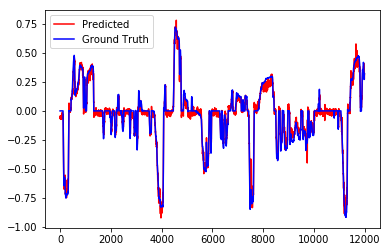

In [10]:
import cv2
import glob
import numpy as np
import nn_models
import data_loading.image_loading as il
import nn_models.Models as models
import data_loading.data_loaders as loaders
import numpy.random
import torch, random
import torch.nn as nn 
import torch.optim as optim
from tqdm import tqdm as tqdm
import pickle
from datetime import datetime
import os
import string
import argparse
from random import randint
from datetime import datetime
import imutils.annotation_utils
from data_loading.image_loading import load_image
import torchvision.transforms as transforms
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

def main(ann_file = 'test_datasets/australia/linear.csv', model_file_ = 'test_models/train_f1_australia/admiralnet/_epoch100.model'):

    
    
    gpu = 0
    plot=True
    
    
    annotation_dir, annotation_file = os.path.split(ann_file)
    model_dir, model_file = os.path.split(model_file_)
    leaf_model_dir = os.path.basename(model_dir)
    config_path = os.path.join(model_dir,'config.pkl')
    config_file = open(config_path,'rb')
    config = pickle.load(config_file)

    model_prefix = leaf_model_dir + model_file.split(".")[0]
   # return

    use_float32 = bool(config['use_float32'])
    label_scale = float(config['label_scale'])
    size = (66,200)
    prefix, _ = annotation_file.split(".")
    prefix = prefix + config['file_prefix']
    context_length = int(config['context_length'])
    sequence_length = int(config['sequence_length'])
    hidden_dim = int(config['hidden_dimension'])
    dataset_type = config['dataset_type']
    output_dimension = 1
    if dataset_type=='optical_flow':
        input_channels=2
        valset = loaders.F1OpticalFlowDataset(ann_file, size, context_length = context_length, sequence_length = sequence_length)
    elif dataset_type=='raw_images':
        input_channels=1
        valset = loaders.F1ImageSequenceDataset(ann_file, size, context_length = context_length, sequence_length = sequence_length)
    elif dataset_type=='combined':
        input_channels=3
        valset = loaders.F1CombinedDataset(ann_file, size, context_length = context_length, sequence_length = sequence_length)
    #optical_flow = bool(config.get('optical_flow',''))
    rnn_cell_type='lstm'
    network = models.AdmiralNet_V2(input_channels= input_channels, gpu = gpu, cell=rnn_cell_type, context_length = context_length, sequence_length=sequence_length, hidden_dim = hidden_dim)
    state_dict = torch.load(model_file_)
    network.load_state_dict(state_dict)
    #network.projector_input = torch.load(  open(os.path.join(model_dir,"projector_input.pt"), 'r+b') ).cuda(gpu)
    #network.init_hidden = torch.load(  open(os.path.join(model_dir,"init_hidden.pt"), 'r+b') ).cuda(gpu)
  #  network.init_cell = torch.load(  open(os.path.join(model_dir,"init_cell.pt"), 'r+b') ).cuda(gpu)
    network = network.float()

    if(gpu>=0):
        network = network.cuda(gpu)
    
    annotation_prefix = annotation_file.split(".")[0]
    image_pickle = os.path.join(valset.root_folder,prefix + valset.image_pickle_postfix)
    labels_pickle = os.path.join(valset.root_folder,prefix + valset.label_pickle_postfix)
    if(os.path.isfile(image_pickle) and os.path.isfile(labels_pickle)):
        valset.loadPickles()
    else:  
        valset.loadFiles()
        valset.writePickles()

    predictions=[]
    ground_truths=[]
    losses=[]
    criterion = nn.MSELoss()
    cum_loss = 0.0
    num_samples = 0
    if(gpu>=0):
        criterion = criterion.cuda(gpu)
    network.eval()
    batch_size = 1
    loader = torch.utils.data.DataLoader(valset, batch_size = batch_size, shuffle = False, num_workers = 0)
    
    t = tqdm(enumerate(loader))
    for (i, (inputs, labels)) in t:
        labels = labels[:,:,0:output_dimension]
        if gpu>=0:
            inputs = inputs.cuda(gpu)
            labels = labels.cuda(gpu)
        # Forward pass:
        outputs = network(inputs)
        loss = criterion(outputs, labels)
        prediction = ((outputs.cpu())[0][0][0]).item()
        ground_truth = ((labels.cpu())[0][0][0]).item()

        predictions.append(prediction)
        ground_truths.append(ground_truth)
        # logging information
        loss_ = loss.item()
        cum_loss += loss_
        num_samples += batch_size
        t.set_postfix(cum_loss = cum_loss/num_samples)
 

    predictions_array = np.array(predictions)
    ground_truths_array = np.array(ground_truths)
    output_file_prefix = "admiralnetv2_prediction_"  + os.path.basename(annotation_dir) + model_prefix
    log_name = output_file_prefix + ".txt"
    # imdir = "admiralnet_prediction_images_" + model_prefix
    #if(os.path.exists(imdir)==False):
    #    os.mkdir(imdir)
    log_output_path = os.path.join(model_dir,log_name)
    log = list(zip(ground_truths_array,predictions_array))
    print("Writing results to: " + log_output_path)
    with open(log_output_path, "w") as myfile:
        for x in log:
            log_item = [x[0],x[1]]
            myfile.write("{0},{1}\n".format(log_item[0],log_item[1]))
    diffs = np.square(np.subtract(predictions_array,ground_truths_array))
    rms = np.sqrt(np.mean(np.array(diffs)))
    rms = np.sqrt(np.mean(np.array(diffs)))
    rms_scikit = sqrt(mean_squared_error(predictions_array, ground_truths_array))    
    print("RMS Error: ", rms)

    if plot:
        fig = plt.figure()
        ax = plt.subplot(111)
        t = np.linspace(0,len(predictions_array)-1,len(predictions_array))
        ax.plot(t,predictions_array,'r',label='Predicted')
        ax.plot(t,ground_truths_array,'b',label='Ground Truth')
        ax.legend()
        plt.savefig(output_file_prefix + ".jpeg")
       # plt.show()
main()